# Predictin of Readmittance rate in  Diabetes patients using kNN classifier

Importing all required python libraries

In [1]:
import pandas as pd                                                #pandas library
%matplotlib inline   
import matplotlib.pyplot as plt                                    #matplotlib library
import numpy as np 
from sklearn.preprocessing import StandardScaler                   #standarscalar for zscore
from sklearn.model_selection import train_test_split               #model selection library
from sklearn.neighbors import KNeighborsClassifier                 #kNN neighbour classifier library 
from sklearn.metrics import classification_report,confusion_matrix #confusion matrix
from sklearn.model_selection import cross_val_score                #crossvalidation score 
from sklearn.metrics import accuracy_score                         #accuracy score

Now lets look at original data set which was collected from myriad hospitals across USA

In [2]:
df = pd.read_csv('diabetic_data.csv') #reading the original dataset 

df.head() #printing only first 5 rows of data set

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


In [3]:
df.info() #printing all the features of data set 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 50 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   encounter_id              101766 non-null  int64 
 1   patient_nbr               101766 non-null  int64 
 2   race                      101766 non-null  object
 3   gender                    101766 non-null  object
 4   age                       101766 non-null  object
 5   weight                    101766 non-null  object
 6   admission_type_id         101766 non-null  int64 
 7   discharge_disposition_id  101766 non-null  int64 
 8   admission_source_id       101766 non-null  int64 
 9   time_in_hospital          101766 non-null  int64 
 10  payer_code                101766 non-null  object
 11  medical_specialty         101766 non-null  object
 12  num_lab_procedures        101766 non-null  int64 
 13  num_procedures            101766 non-null  int64 
 14  num_

# Processed Dataset

Now as we have looked at the original dataset and al the features, most of this data set was cleaned in GoogleRefine and below printed data set is the one which was accuried after data cleaning.

In [4]:
df1 = pd.read_csv('jaga_project.csv') #reading cleaned dataset
df1.head() #printing cleaned dataset

,encounter_id,patient_nbr,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,medical_specialty,...,glimepiride,glipizide,glyburide,pioglitazone,rosiglitazone,acarbose,insulin,change,diabetesMed,readmitted
0,2278392,8222157,0,0,0,6,25,1,1,37,...,1,1,1,1,1,0,1,1,0,3
1,149190,55629189,0,0,1,1,1,7,3,19,...,1,1,1,1,1,0,3,0,1,1
2,500364,82442376,0,1,3,1,1,7,2,19,...,1,1,1,1,1,0,3,0,1,3
3,16680,42519267,0,1,4,1,1,7,1,19,...,1,2,1,1,1,0,2,0,1,3
4,35754,82637451,0,1,5,2,1,2,3,19,...,1,1,1,1,1,0,2,1,1,1


In [5]:
df1.shape #looking at the shape of the dataset after cleaning the data

(65759, 34)

# Class feature Values

This data set is a multiclass value dataset as it has 3 different values in class and they have been assigned respective values
 <30 = 0 ;  >30 = 1 ;  NO  = 3 

In [6]:
df1['readmitted'].value_counts() #printing different values of class feature

3    39573
1    20417
0     5769
Name: readmitted, dtype: int64

# Detecting Outliers for Numerical features

This data set has few numerical features like time_in_hospital, num_lab_procedures, num_procedures, num_medications, number_outpatient, number_emergency, number_inpatient. FUnction is written to visuzlize these numerical values in feature through box plot, by looking at box plot we can see there are few outliers in the dataset. 

In [7]:
import matplotlib.pyplot as plt #importing matplotlib for boxplot

In [8]:
#looking for outliers 

def plot_boxplot(df,ft):      #defining a function
    df.boxplot(column=[ft])   #printing boxplot verticaly
    plt.grid(False)           #switching off the grid in boxplot
    plt.show()                #printing the box plot

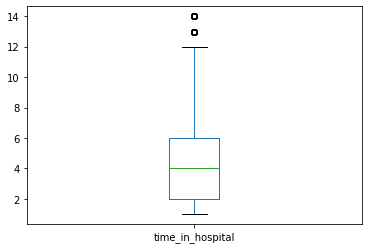

In [9]:
plot_boxplot(df1, "time_in_hospital") #boxplot for time in hospital

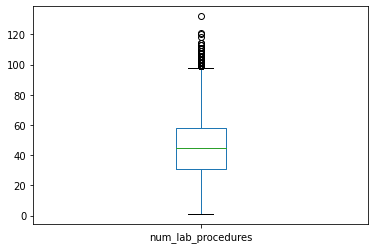

In [10]:
plot_boxplot(df1, "num_lab_procedures") #boxplot for num of lab procedures

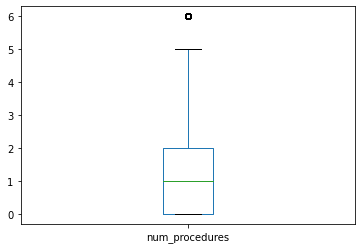

In [11]:
plot_boxplot(df1, "num_procedures")  #blox plot for num of procedures

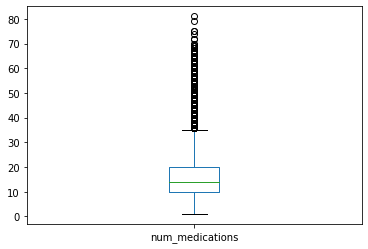

In [12]:
plot_boxplot(df1, "num_medications")  #boxplot for num of medications

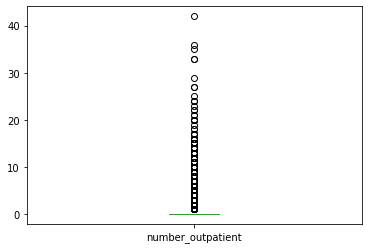

In [13]:
plot_boxplot(df1, "number_outpatient") #boxplot for number outpaitents

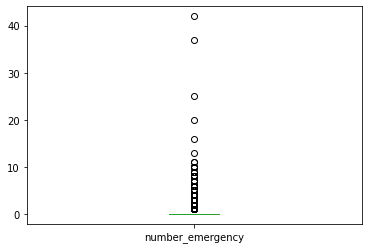

In [14]:
plot_boxplot(df1, "number_emergency")  #boxplot for num emergency

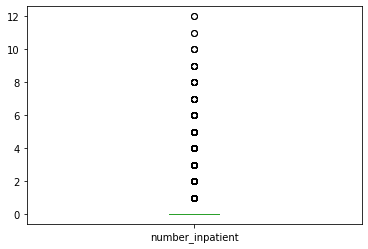

In [15]:
plot_boxplot(df1, "number_inpatient")  #boxplot for number inpaitent

Since there are outliers present in time_in_hospital, num_lab_procedures, num_procedures, num_medications, the outliers will be replaced by median of the respective feature values.

In [16]:
import numpy as np #importing numpy for numerical calculation

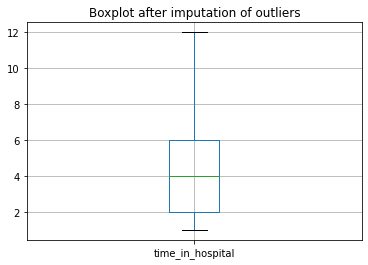

In [17]:
for i in df1["time_in_hospital"]:                       #creating a for loop
        q1 = df1["time_in_hospital"].quantile(0.25)     #calculating 1st quartile
        q3 = df1["time_in_hospital"].quantile(0.75)     #calculating 3rd quartile
        iqr = q3-q1                                     #calculating inter quartile range
        lower = q1 - 1.5 * iqr                          #setting up lower vlaue
        upper = q3 + 1.5 * iqr                          #setting up upper value
        if i>upper or i<lower:                          
            df1["time_in_hospital"] = df1["time_in_hospital"].replace(i,np.median(df1["time_in_hospital"]))
df1.boxplot(column=["time_in_hospital"]) #if vlaues lie below the lower value and bove the upper value it will be replaced by median               
plt.title("Boxplot after imputation of outliers")       #printing boxplot after imputation of outliers
plt.show()
      
        
       
    

Above method has been applied for other three features as well 

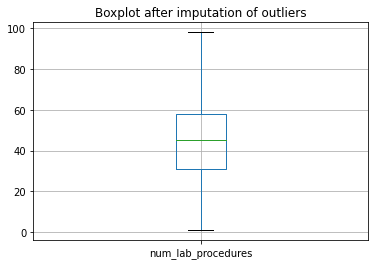

In [18]:
for i in df1["num_lab_procedures"]:
        q1 = df1["num_lab_procedures"].quantile(0.25)
        q3 = df1["num_lab_procedures"].quantile(0.75)
        iqr = q3-q1
        lower = q1 - 1.5 * iqr
        upper = q3 + 1.5 * iqr
        if i>upper or i<lower:
            df1["num_lab_procedures"] = df1["num_lab_procedures"].replace(i,np.median(df1["num_lab_procedures"]))
df1.boxplot(column=["num_lab_procedures"])
plt.title("Boxplot after imputation of outliers")
plt.show()

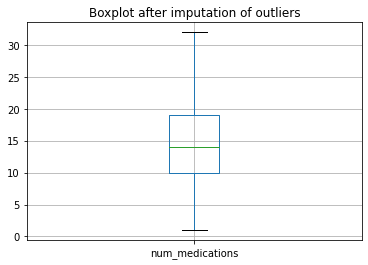

In [19]:
for i in df1["num_medications"]:
        q1 = df1["num_medications"].quantile(0.25)
        q3 = df1["num_medications"].quantile(0.75)
        iqr = q3-q1
        lower = q1 - 1.5 * iqr
        upper = q3 + 1.5 * iqr
        if i>upper or i<lower:
            df1["num_medications"] = df1["num_medications"].replace(i,np.median(df1["num_medications"]))
df1.boxplot(column=["num_medications"])
plt.title("Boxplot after imputation of outliers")
plt.show()

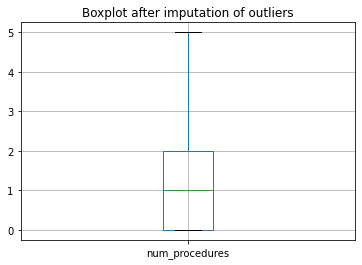

In [20]:
for i in df1["num_procedures"]:
        q1 = df1["num_procedures"].quantile(0.25)
        q3 = df1["num_procedures"].quantile(0.75)
        iqr = q3-q1
        lower = q1 - 1.5 * iqr
        upper = q3 + 1.5 * iqr
        if i>upper or i<lower:
            df1["num_procedures"] = df1["num_procedures"].replace(i,np.median(df1["num_procedures"]))
df1.boxplot(column=["num_procedures"])
plt.title("Boxplot after imputation of outliers")
plt.show()

Dropping encounter id and paitent nbr as they are nominal data and they dont contribute to ML model

In [21]:
df_n = df1.drop(['encounter_id','patient_nbr'],axis=1) #dropping the features

df_n.head()

,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,medical_specialty,num_lab_procedures,num_procedures,...,glimepiride,glipizide,glyburide,pioglitazone,rosiglitazone,acarbose,insulin,change,diabetesMed,readmitted
0,0,0,0,6,25,1,1,37,41,0,...,1,1,1,1,1,0,1,1,0,3
1,0,0,1,1,1,7,3,19,59,0,...,1,1,1,1,1,0,3,0,1,1
2,0,1,3,1,1,7,2,19,44,1,...,1,1,1,1,1,0,3,0,1,3
3,0,1,4,1,1,7,1,19,51,0,...,1,2,1,1,1,0,2,0,1,3
4,0,1,5,2,1,2,3,19,31,1,...,1,1,1,1,1,0,2,1,1,1


# Transformation of dataset values

Since few feature values are in different scales,  standardscalar  is used to bring all values to to same scale

In [22]:
from sklearn.preprocessing import StandardScaler                     #importing standard scalar library
scaler = StandardScaler()                                            #assigning standar sclar 
scaler.fit(df_n.drop("readmitted",axis=1))                           #fitting scalar to the dataset and dropping readmittance
scaled_features = scaler.transform(df_n.drop("readmitted",axis=1))   #transforming the dataset to standardscalar

df_scaled = pd.DataFrame(scaled_features,columns=df_n.columns[:-1])  #assigning the zscore data to dataframe and prinitng it
df_scaled.head()


,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,medical_specialty,num_lab_procedures,num_procedures,...,repaglinide,glimepiride,glipizide,glyburide,pioglitazone,rosiglitazone,acarbose,insulin,change,diabetesMed
0,-0.456536,-0.937201,-3.819948,2.590701,4.068307,-1.131634,-1.183747,1.239230,-0.124157,-0.840429,...,-0.105234,-0.21334,-0.337417,-0.3014,-0.268509,-0.252908,-0.051638,-0.499076,0.902353,-1.777228
1,-0.456536,-0.937201,-3.191306,-0.720113,-0.491366,0.309533,-0.423979,-0.119484,0.780623,-0.840429,...,-0.105234,-0.21334,-0.337417,-0.3014,-0.268509,-0.252908,-0.051638,1.986155,-1.108213,0.562674
2,-0.456536,1.067007,-1.934021,-0.720113,-0.491366,0.309533,-0.803863,-0.119484,0.026640,-0.115708,...,-0.105234,-0.21334,-0.337417,-0.3014,-0.268509,-0.252908,-0.051638,1.986155,-1.108213,0.562674
3,-0.456536,1.067007,-1.305379,-0.720113,-0.491366,0.309533,-1.183747,-0.119484,0.378498,-0.840429,...,-0.105234,-0.21334,2.372095,-0.3014,-0.268509,-0.252908,-0.051638,0.743540,-1.108213,0.562674
4,-0.456536,1.067007,-0.676737,-0.057950,-0.491366,-0.891440,-0.423979,-0.119484,-0.626812,-0.115708,...,-0.105234,-0.21334,-0.337417,-0.3014,-0.268509,-0.252908,-0.051638,0.743540,0.902353,0.562674


In [23]:
df_y = df_n[['readmitted']] #taking class value sepratley

df_y.head()

,readmitted
0,3
1,1
2,3
3,3
4,1


# Implementing kNN Classifier

The data set is split into test and training set

In [24]:
from sklearn.model_selection import train_test_split          #importing traintest
X_train, X_test, y_train, y_test = train_test_split(scaled_features,df_y['readmitted'], #splitting dataset into 7:3 ratio
                                                    test_size=0.30)

In [25]:
from sklearn.neighbors import KNeighborsClassifier #importing kNN classifier

In [26]:
from sklearn.metrics import classification_report,confusion_matrix #importing confusion matrix
from sklearn.model_selection import cross_val_score                #importing cross validation value

Since kNN requires k value to execeute, kNN is executed for k values from 1 to 40 and plotted against respective accuracy

In [27]:
accuracy_rate = []

for i in range(1,40):                                               #creating forloop for calculating of knn
    
    knn = KNeighborsClassifier(n_neighbors=i)                       #assgning knnclassifier to knn
    score=cross_val_score(knn,df_scaled,df_y['readmitted'],cv=10)   #fiding cross validation score 
    accuracy_rate.append(score.mean())                              #finding accuracy

Text(0, 0.5, 'Accuracy Rate')

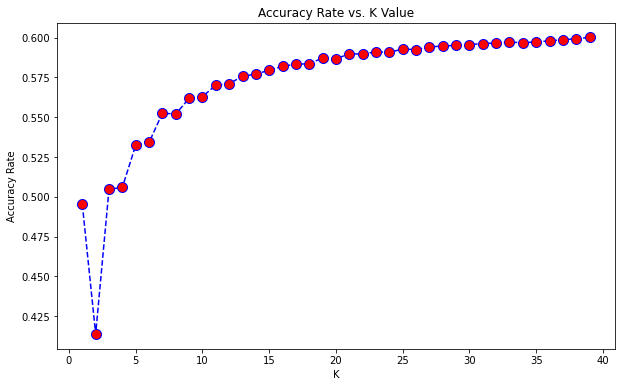

In [28]:
import matplotlib.pyplot as plt                                     #importing matlib 

plt.figure(figsize=(10,6))                                          #setting graph size

plt.plot(range(1,40),accuracy_rate,color='blue', linestyle='dashed', marker='o',  
         markerfacecolor='red', markersize=10)                      #setting what values to be plotted 
plt.title('Accuracy Rate vs. K Value')                              #giving title to the graph
plt.xlabel('K')                                                     #naming x axis and y axis
plt.ylabel('Accuracy Rate')

From this graph we can see that accuracy is highest at around 30

# Calculating accuracy and Confusion matrix

Accuracy for k= 10,20,30

In [29]:
#fitting kNN  model on the data with 10 as neighbour
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(X_train,y_train)

pred = knn.predict(X_test)                 #predicting values on test set

print(confusion_matrix(y_test,pred))        

[[  27  461 1229]
 [  72 1742 4327]
 [  85 2263 9522]]


In [30]:
#checking the accuracy of the test 
from sklearn.metrics import accuracy_score

accuracy_score(y_test,pred)*100

57.23337388483374

In [31]:
#fitting kNN  model on the data with 20 as neighbour
knn = KNeighborsClassifier(n_neighbors=20)
knn.fit(X_train,y_train)

pred = knn.predict(X_test)

print(confusion_matrix(y_test,pred))

[[    9   356  1352]
 [   14  1242  4885]
 [   13  1405 10452]]


In [32]:
accuracy_score(y_test,pred)*100

59.321776155717764

In [33]:
#fitting kNN  model on the data with 30 as neighbour
knn = KNeighborsClassifier(n_neighbors=30)
knn.fit(X_train,y_train)

pred = knn.predict(X_test)

print(confusion_matrix(y_test,pred))

[[    3   284  1430]
 [    4   987  5150]
 [    2  1028 10840]]


In [34]:
accuracy_score(y_test,pred)*100

59.96553122465531

In [35]:
#calculating precision and recall and printing for k=30
from sklearn import metrics

print(metrics.classification_report(y_test,pred, digits=3))

              precision    recall  f1-score   support

           0      0.333     0.002     0.003      1717
           1      0.429     0.161     0.234      6141
           3      0.622     0.913     0.740     11870

    accuracy                          0.600     19728
   macro avg      0.462     0.359     0.326     19728
weighted avg      0.537     0.600     0.518     19728

